In [13]:
# %%
# Imports
import pandas as pd
import plotly.express as px
from plotly.graph_objs import Figure
from src.config import df, p32_tag_map
import plotly.colors as pc

In [11]:
count: pd.DataFrame = (
    df["p32"]
    .value_counts(normalize=True)
    .mul(100)
    .rename_axis("valores")
    .reset_index(name="porcentaje")
    .sort_values(by="valores", ascending=True)
)

count


,valores,porcentaje
6,0,5.412541
8,1,2.904290
3,2,8.646865
1,3,14.851485
2,4,13.828383
0,5,32.508251
4,6,6.699670
5,7,5.577558
9,8,2.409241
11,9,0.594059


In [40]:
numeric_values = count.valores.unique()
colors = pc.sample_colorscale("RdBu", len(numeric_values))
colors = [
    "#FF0000",  # rojo
    "#CC3333",
    "#996666",
    "#808080",  # gris
    "#667799",
    "#4C66B2",
    "#3366CC",
    "#1A66E5",
    "#0055FF",  # azul fuerte
    "#0033CC",  # azul oscuro
        "#0033CC",  # azul oscuro

]

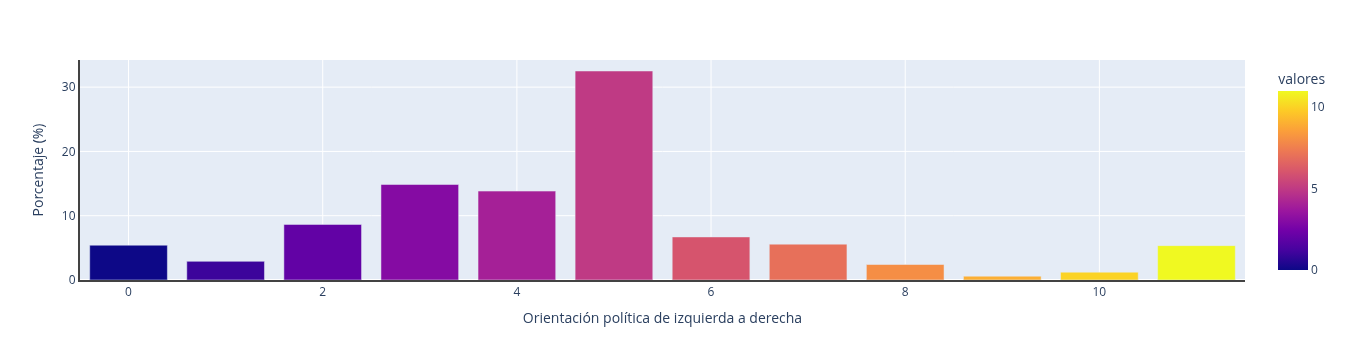

In [48]:
import plotly.express as px

# dfcount con tus 12 categorías
dfcount = (
    df["p32"]
    .value_counts(normalize=True)
    .mul(100)
    .rename_axis("valores")
    .reset_index(name="porcentaje")
)

# Lista de 12 colores (rojo → gris → azul)
colors = [
    "#FF0000", "#E63939", "#CC7777", "#AAAAAA", "#888888", "#666666", 
    "#6688AA", "#3366CC", "#0044FF", "#0033CC", "#0022AA", "#001188"
]

# Forzar orden de categorías
category_order = sorted(dfcount["valores"].unique())

fig = px.bar(
    dfcount,
    x="valores",
    y="porcentaje",
    color="valores",
    color_discrete_sequence=colors,
    category_orders={"valores": category_order}  # asegura correspondencia
)

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor="#434343",
        linewidth=2,
        title="Orientación política de izquierda a derecha"
    ),
    yaxis=dict(
        showline=True,
        zeroline=True,
        showticklabels=True,
        linecolor="#434343",
        linewidth=2,
        title="Porcentaje (%)"
    )
)

fig.show()


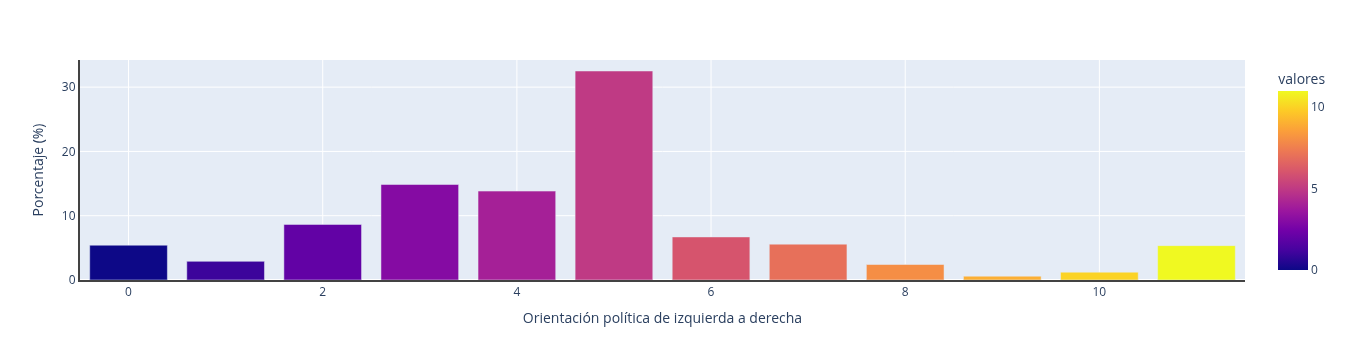

In [43]:
import plotly.express as px

colors = [
    "#FF0000",  # rojo
    "#FF4000",
    "#FF8000",
    "#FFBF00",
    "#FFFF00",
    "#808080",  # gris
    "#00BFFF",
    "#0080FF",
    "#0040FF",
    "#0000FF"   # azul
]

fig = px.bar(
    count,
    x="valores",
    y="porcentaje",
    color="valores",
    color_discrete_sequence=colors,
    category_orders={"valores": [
        "Izquierda fuerte", "Izquierda", "Centro-izquierda", "Centro moderado", 
        "Centro", "Indefinido", "Centro-derecha", "Derecha", "Derecha fuerte", "Ultraderecha"
    ]}
)

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor="#434343",
        linewidth=2,
        title="Orientación política de izquierda a derecha"
    ),
    yaxis=dict(
        showline=True,
        zeroline=True,
        showticklabels=True,
        linecolor="#434343",
        linewidth=2,
        title="Porcentaje (%)"
    )
)
